# **ASSIGNMENT CHAPTER 3**


*   **Nama : Delta Putik Kemuning**
*   **SCID : SC62817**




### **1. Memilih Model machine learning yang relevan**

Model machine learning yang dapat digunakan untuk dataset housing price ini adalah model superviced learning. ada beberapa algoritma yang cocok untuk regression pada dataset ini diantaranya

- Linear Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradien Boosting Regression
- Neural Network

### **2. Alasan penggunaan model machine learning  pada poin 1**

Model supervised learning sangat cocok digunakan pada dataset ini karena dataset ini memiliki label atau output, yang merupakan karakteristik utama dari pembelajaran terawasi. Hal ini berbeda dengan model unsupervised learning, yang hanya terdiri dari input saja. Dalam dataset ini, "Sale Price" merupakan output yang nilainya bergantung pada variabel lain seperti "LotArea" dan "GrLivArea", yang merupakan variabel bebas (independent variables).

Untuk dataset ini, algoritma yang cocok adalah XGBoost (eXtreme Gradient Boosting) karena kemampuannya yang efisien dan efektif dalam menangani dataset semacam ini. Namun, disini juga akan dicoba algoritma Random Forest Regression sebagai alternatif lainnya.

XGBoost (Extreme Gradient Boosting) adalah algoritma yang memanfaatkan teknik penguatan gradien untuk meningkatkan kinerja model secara bertahap. Dengan memperbaiki kesalahan prediksi pada setiap iterasi, XGBoost menghasilkan serangkaian model prediktif yang kuat. Algoritma ini didasarkan pada pohon keputusan dan memiliki kemampuan untuk menangani berbagai jenis data serta fitur-fitur kategorikal. XGBoost terkenal karena kemampuannya dalam menangani masalah regresi dan klasifikasi, serta untuk kinerja yang tinggi dan skalabilitasnya.

Random Forest Regression, di sisi lain, adalah jenis algoritma ensemble yang menggunakan banyak pohon keputusan untuk meningkatkan akurasi prediksi. Dalam Random Forest, setiap pohon keputusan dibangun secara independen menggunakan sampel acak dari data latih dan fitur-fitur yang dipilih secara acak. Prediksi akhir diperoleh dengan mengambil rata-rata dari prediksi semua pohon keputusan. Keuntungan utama dari Random Forest adalah kemampuannya untuk menangani masalah overfitting dan kemampuannya untuk digunakan pada berbagai jenis dataset, termasuk data dengan fitur kategorikal dan non-linear. Hal ini menjadikannya pilihan yang populer dalam analisis data untuk masalah regresi.







### **3. Eksekusi coding machine learning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [ ]:
# Machine Learning Libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, make_scorer, accuracy_score
from scipy import stats
from math import ceil

In [ ]:
# update default parameter
plt.rcParams.update({'font.size': 12, 'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.labelsize':15, 'axes.titlesize':20})

In [ ]:
train = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJPmd7JbB9tvBQHLJkam4iwPXLiEACAGpIheoN4VHjpuOVlfse2h27wvJji_uogd5FM1_gmv0-pxOl/pub?gid=1026121231&single=true&output=csv"

In [ ]:
#Read the data
data = pd.read_csv(train)

#Remove rows with missing target
data = data.dropna(axis=0, subset=['SalePrice'])
data = data.drop(['Id'], axis=1)

#Separate target from predictors
X = data.drop(['SalePrice'], axis=1)
y = data.SalePrice

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [ ]:
info = pd.DataFrame(X.dtypes, columns=['Dtype'])
info['Unique'] = X.nunique().values
info['Null'] = X.isnull().sum().values
info

Dtype  Unique  Null
MSSubClass       int64      15     0
MSZoning        object       5     0
LotFrontage    float64     110   259
LotArea          int64    1073     0
Street          object       2     0
Alley           object       2  1369
LotShape        object       4     0
LandContour     object       4     0
Utilities       object       2     0
LotConfig       object       5     0
LandSlope       object       3     0
Neighborhood    object      25     0
Condition1      object       9     0
Condition2      object       8     0
BldgType        object       5     0
HouseStyle      object       8     0
OverallQual      int64      10     0
OverallCond      int64       9     0
YearBuilt        int64     112     0
YearRemodAdd     int64      61     0
RoofStyle       object       6     0
RoofMatl        object       8     0
Exterior1st     object      15     0
Exterior2nd     object      16     0
MasVnrType      object       3   872
MasVnrArea     float64     327     8
ExterQual       object       4     0
ExterCond       object       5     0
Foundation      object       6     0
BsmtQual        object       4    37
BsmtCond        object       4    37
BsmtExposure    object       4    38
BsmtFinType1    object       6    37
BsmtFinSF1       int64     637     0
BsmtFinType2    object       6    38
BsmtFinSF2       int64     144     0
BsmtUnfSF        int64     780     0
TotalBsmtSF      int64     721     0
Heating         object       6     0
HeatingQC       object       5     0
CentralAir      object       2     0
Electrical      object       5     1
1stFlrSF         int64     753     0
2ndFlrSF         int64     417     0
LowQualFinSF     int64      24     0
GrLivArea        int64     861     0
BsmtFullBath     int64       4     0
BsmtHalfBath     int64       3     0
FullBath         int64       4     0
HalfBath         int64       3     0
BedroomAbvGr     int64       8     0
KitchenAbvGr     int64       4     0
KitchenQual     object       4     0
TotRmsAbvGrd     int64      12     0
Functional      object       7     0
Fireplaces       int64       4     0
FireplaceQu     object       5   690
GarageType      object       6    81
GarageYrBlt    float64      97    81
GarageFinish    object       3    81
GarageCars       int64       5     0
GarageArea       int64     441     0
GarageQual      object       5    81
GarageCond      object       5    81
PavedDrive      object       3     0
WoodDeckSF       int64     274     0
OpenPorchSF      int64     202     0
EnclosedPorch    int64     120     0
3SsnPorch        int64      20     0
ScreenPorch      int64      76     0
PoolArea         int64       8     0
PoolQC          object       3  1453
Fence           object       4  1179
MiscFeature     object       4  1406
MiscVal          int64      21     0
MoSold           int64      12     0
YrSold           int64       5     0
SaleType        object       9     0
SaleCondition   object       6     0

In [ ]:
X.dtypes.value_counts()

object     43
int64      33
float64     3
Name: count, dtype: int64

In [ ]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

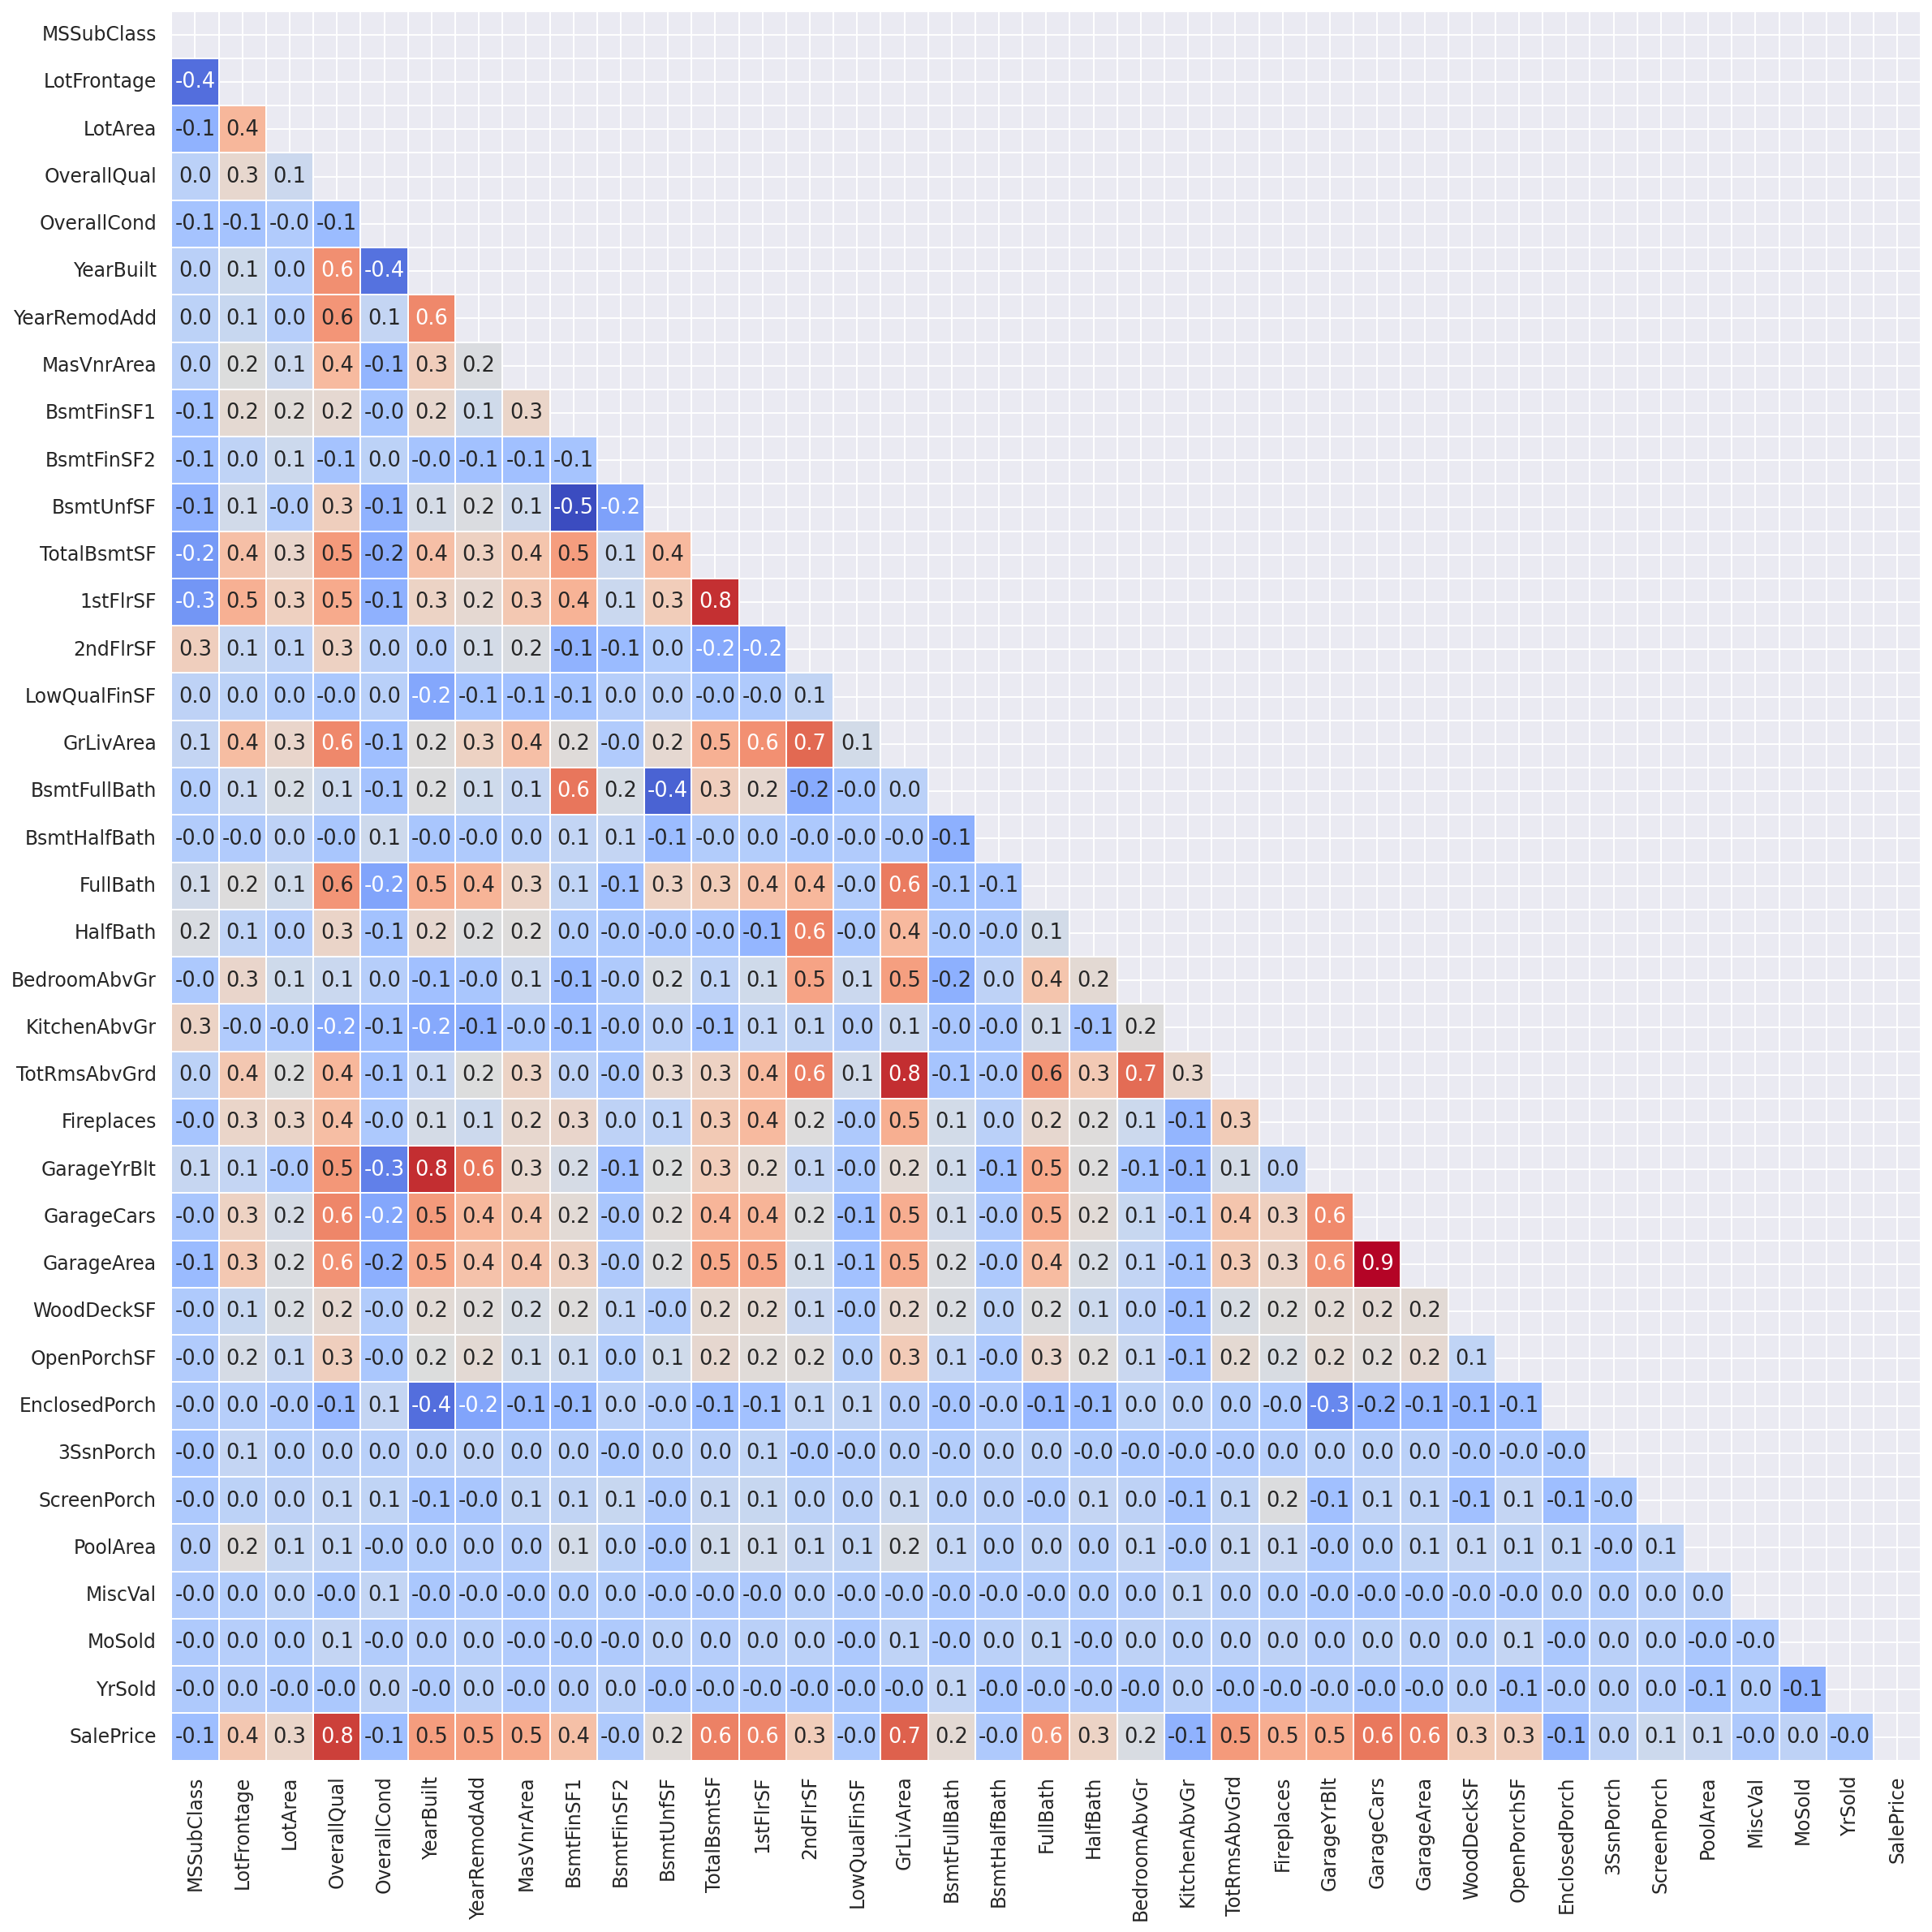

In [ ]:
# melihat korelasi antar fitur
num_data = data.select_dtypes(include=['number'])

correlation_matrix = num_data.corr()

mask = np.triu(correlation_matrix.corr())

sns.set(font_scale=1.1)
plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm',
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

**Data Cleaning**

Menghilangkan data yang memiliki missing value lebih dari setengah jumlah data

In [ ]:
def show_null_values(X):
    # Missing values in each column of Training data
    null_value = X.isnull().sum()

    # Making DataFrame for displaying missing values in training data
    null_values = pd.DataFrame(null_value, columns=['Housing Prices'])

    # Filtering to show only columns with missing values and sorting them
    null_values = null_values[null_values['Housing Prices'] != 0]
    null_values = null_values.sort_values(by='Housing Prices', ascending=False)

    print("Total missing values in dataset:", null_values['Housing Prices'].sum(), sep='\n')

    return null_values

In [ ]:
show_null_values(X)

Total missing values in dataset:
7829


Housing Prices
PoolQC                  1453
MiscFeature             1406
Alley                   1369
Fence                   1179
MasVnrType               872
FireplaceQu              690
LotFrontage              259
GarageType                81
GarageYrBlt               81
GarageFinish              81
GarageQual                81
GarageCond                81
BsmtFinType2              38
BsmtExposure              38
BsmtFinType1              37
BsmtCond                  37
BsmtQual                  37
MasVnrArea                 8
Electrical                 1

In [ ]:
null_cols = [col for col in X.columns if X[col].isnull().sum() > len(X)/2]
null_cols

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
X.drop(null_cols,axis=1,inplace=True)

In [ ]:
# Jumlah missing values setelah menghilangkan kolom yang memiliki lebih dari setengah missing value

print("Total missing values:")
print("Housing Prices\t",X.isnull().sum().sum())

Total missing values:
Housing Prices	 1550


**Visualisasi untuk kategorikal data**

In [ ]:
object_cols = X.select_dtypes('object').columns
len(object_cols)

38

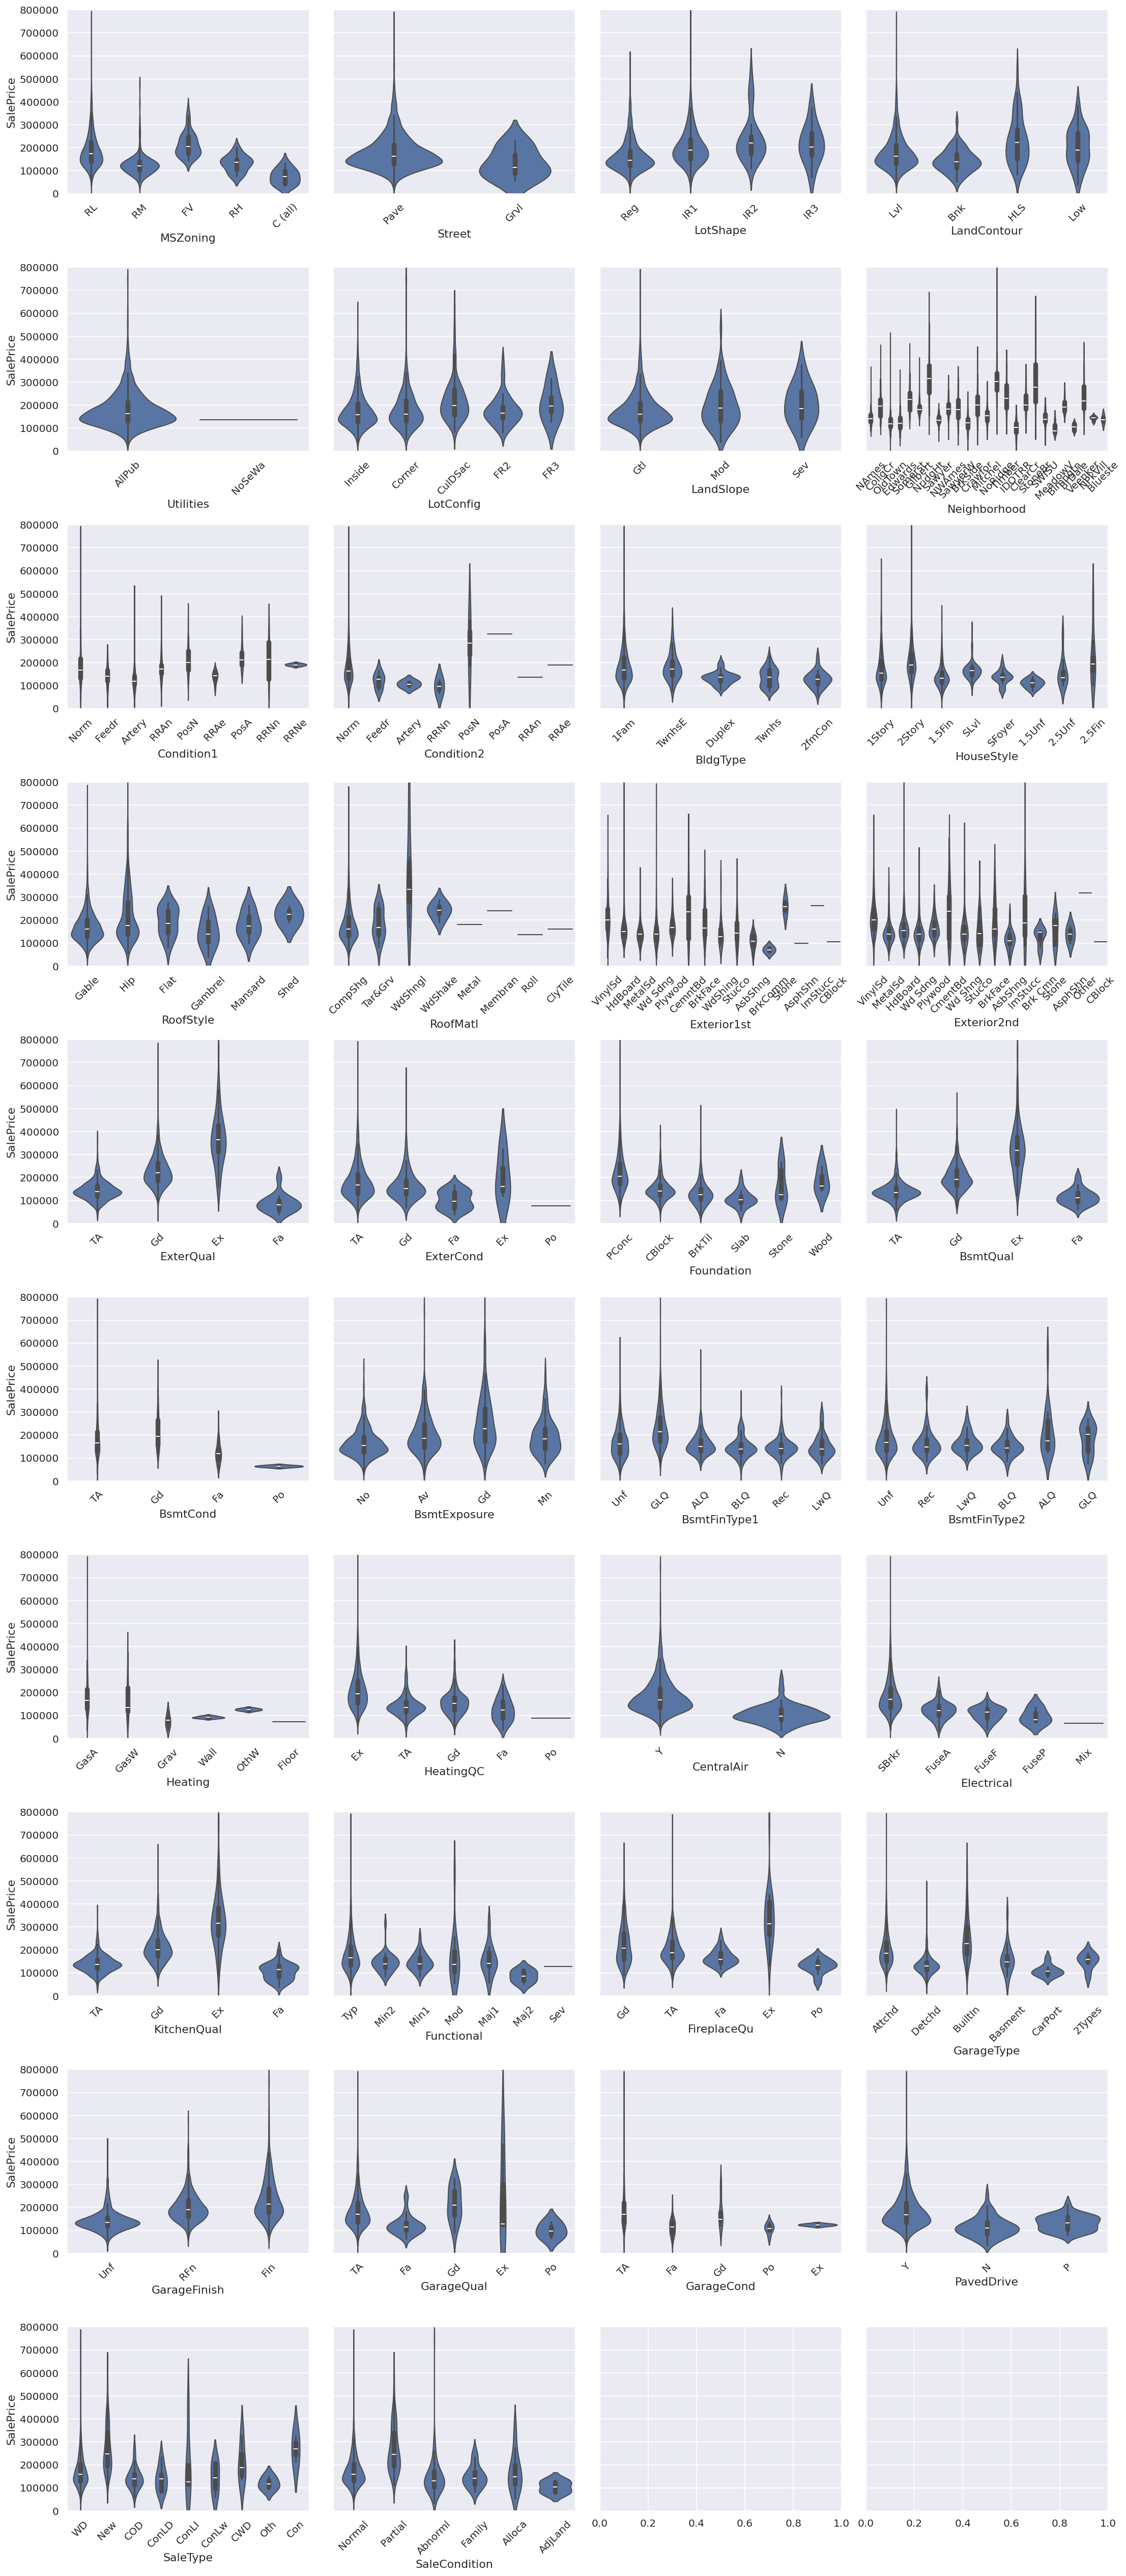

In [ ]:
fig, ax = plt.subplots(nrows=ceil(len(object_cols) / 4), ncols=4, figsize=(22, 1.4*len(object_cols)), sharey=True, dpi=120)

for col, subplot in zip(object_cols, ax.flatten()):
    freq = X[col].value_counts()
    subplot.ticklabel_format(style='plain')
    plt.ylim([0, 800000])
    plt.subplots_adjust(wspace=.1,hspace=.4)
    for tick in subplot.get_xticklabels():
        tick.set_rotation(45)
    sns.violinplot(data=X, x=col, y=y, order=freq.index, ax=subplot)

In [ ]:
# Menghapus kolom yang mayoritas datanya hanya terdiri dari 1 kategori
X.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [ ]:
X.drop('Utilities',axis=1,inplace=True)

### **Feature Engineering**

In [ ]:
X.shape, y.shape

((1460, 73), (1460,))

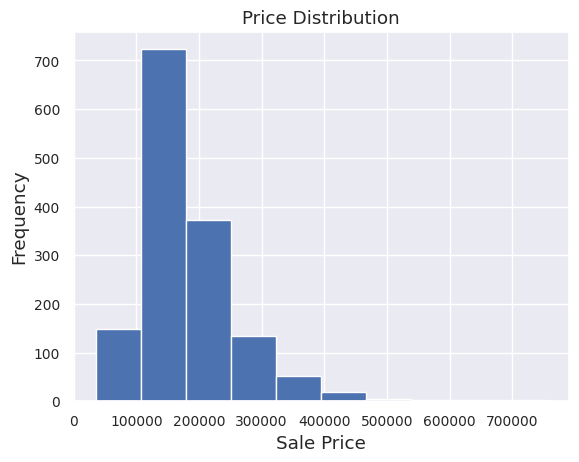

In [ ]:
y.hist()
plt.title('Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10);

In [ ]:
mask = y < 450000
y = y[mask]
X = X[mask]

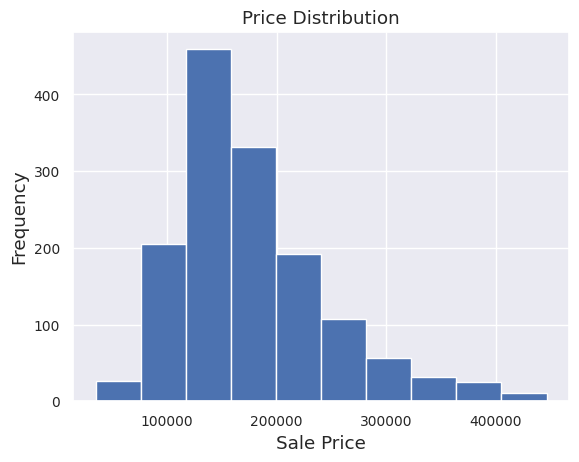

In [ ]:
y.hist()
plt.title('Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10);

In [ ]:
print(X.shape, y.shape)

(1446, 73) (1446,)


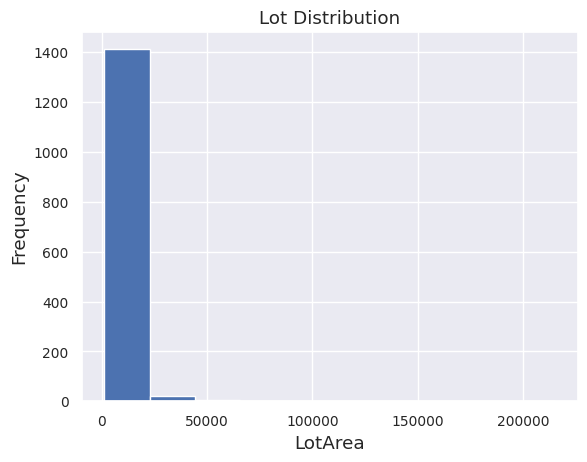

In [ ]:
X['LotArea'].hist()
plt.title('Lot Distribution')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10);

In [ ]:
mask_Lot = X['LotArea'] < 26000
y = y[mask_Lot]
X = X[mask_Lot]

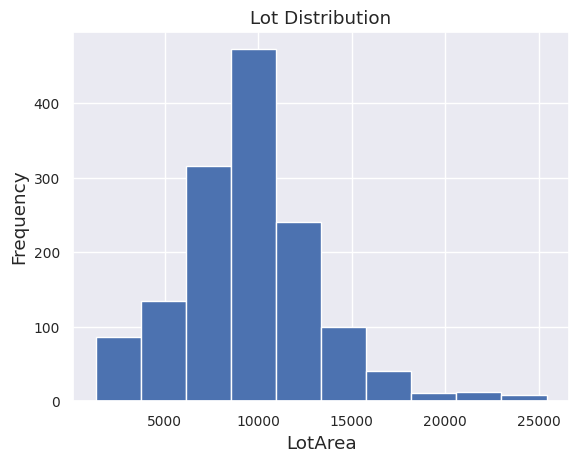

In [ ]:
X['LotArea'].hist()
plt.title('Lot Distribution')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10);

In [ ]:
print(X.shape, y.shape)

(1421, 73) (1421,)


In [ ]:
# Concat fitur baru dengan original fitur
X = pd.concat([X], axis=1)
X.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   

   OverallQual  ...  GarageArea  GarageQual  GarageCond PavedDrive WoodDeckSF  \
0            7  ...         548          TA          TA          Y          0   
1            6  ...         460          TA          TA          Y        298   

  OpenPorchSF EnclosedPorch  3SsnPorch ScreenPorch PoolArea MiscVal MoSold  \
0          61             0          0           0        0       0      2   
1           0             0          0           0        0       0      5   

  YrSold SaleType SaleCondition  
0   2008       WD        Normal  
1   2007       WD        Normal  

[2 rows x 73 columns]

In [ ]:
X.shape

(1421, 73)

### **Visualisasi Data**

In [ ]:
Xy = X.copy()
Xy['SalesPrice'] = y
Xy.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   

   OverallQual  ...  GarageQual  GarageCond  PavedDrive WoodDeckSF  \
0            7  ...          TA          TA           Y          0   
1            6  ...          TA          TA           Y        298   

  OpenPorchSF EnclosedPorch 3SsnPorch  ScreenPorch PoolArea MiscVal MoSold  \
0          61             0         0            0        0       0      2   
1           0             0         0            0        0       0      5   

  YrSold SaleType SaleCondition SalesPrice  
0   2008       WD        Normal     208500  
1   2007       WD        Normal     181500  

[2 rows x 74 columns]

Membuat fungsi untuk mengotomatisasi pembuatan 4 jenis plot untuk satu variabel numerik.

In [ ]:
def univariate_numerical_plot(df, x):
    fig, ax = plt.subplots(1, 4, figsize=(20, 6), dpi=100)

    # 0) histogram
    sns.histplot(data=df, x=x, kde=True, ax=ax[0], bins=min(df[x].nunique(),10), kde_kws={'bw_adjust':3})
    sns.despine(bottom=True, left=True)
    ax[0].set_title('histogram')
    ax[0].set_xlabel(xlabel=x)

    # 1) box plot
    sns.boxplot(data=df, y=x, ax=ax[1])
    ax[1].set_title('boxplot')
    ax[1].set_ylabel(ylabel=x)

    # 2) probability plot
    plt.sca(ax[2])
    stats.probplot(df[x], dist = "norm", plot = plt)

    # 3) scatterplot
    sns.scatterplot(x=df[x], y=y, ax=ax[3])

    fig.tight_layout()
    fig.text(0.5, 1, f'Distribution of {x}', size=25, ha="center", va="center")
    plt.show()

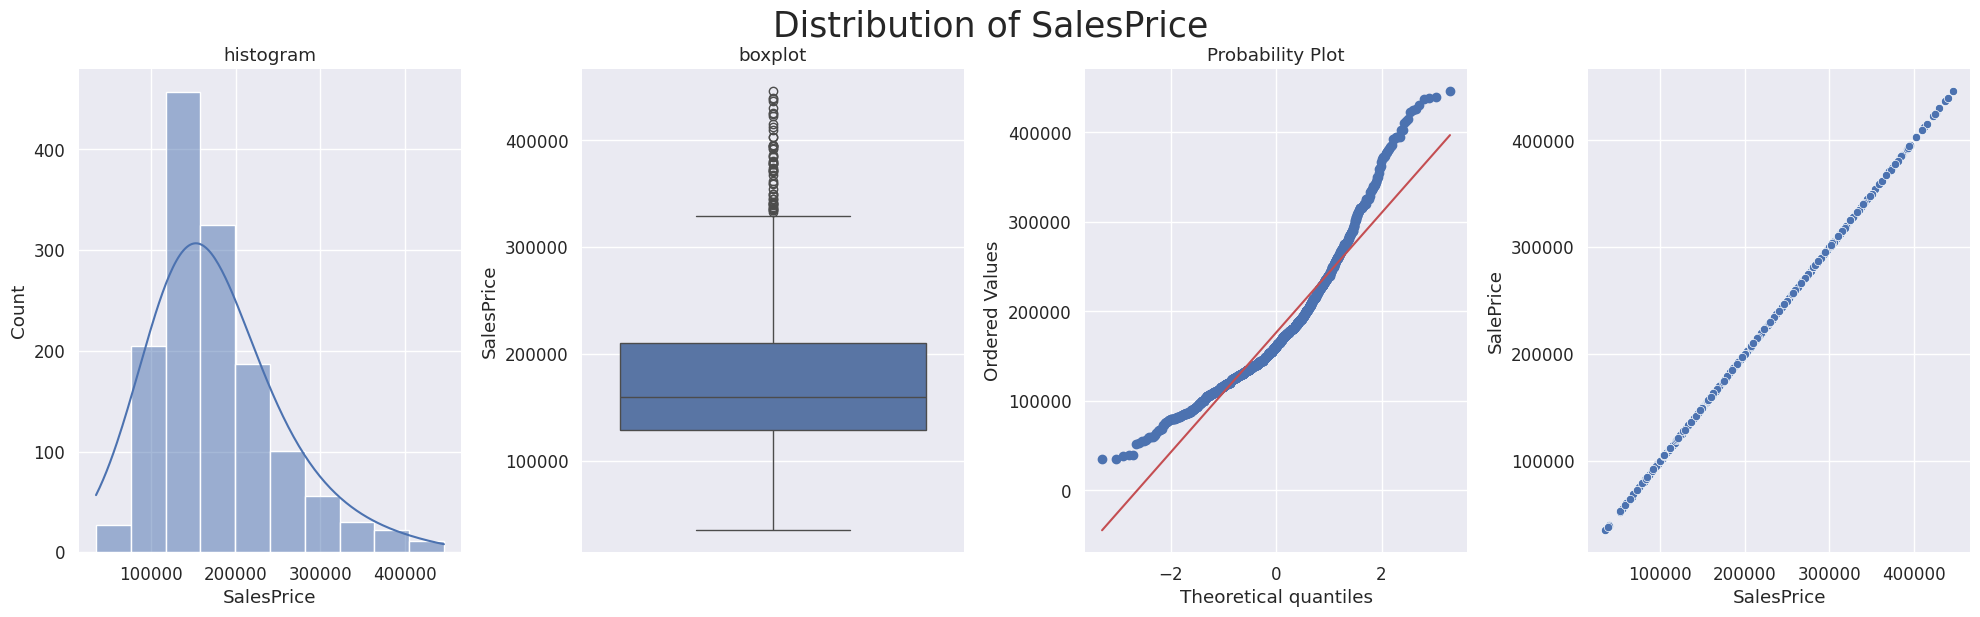

In [ ]:
univariate_numerical_plot(Xy,'SalesPrice')

Dari banyaknya fitur yang digunakan untuk plotting, disini saya berfokus pada itur yang memiliki korelasi linear yang lebih tinggi.

In [ ]:
# Korelasi antara X dan Y
XyNum = Xy.select_dtypes(include=['number'])

corr_s = XyNum.corr(method='spearman')
corr_with_price = pd.DataFrame(corr_s['SalesPrice'])

corr_with_price.rename(columns = {'SalesPrice':'spearman'}, inplace = True)

corr_p = XyNum.corr(method='pearson')
corr_with_price['pearson']=corr_p['SalesPrice']

corr_with_price = corr_with_price.sort_values('pearson',ascending=False)
round(corr_with_price,2)

NameError: name 'Xy' is not defined

In [ ]:
# Top 5 fitur dengan korelasi tertinggi
top_features = corr_with_price.index[1:6]

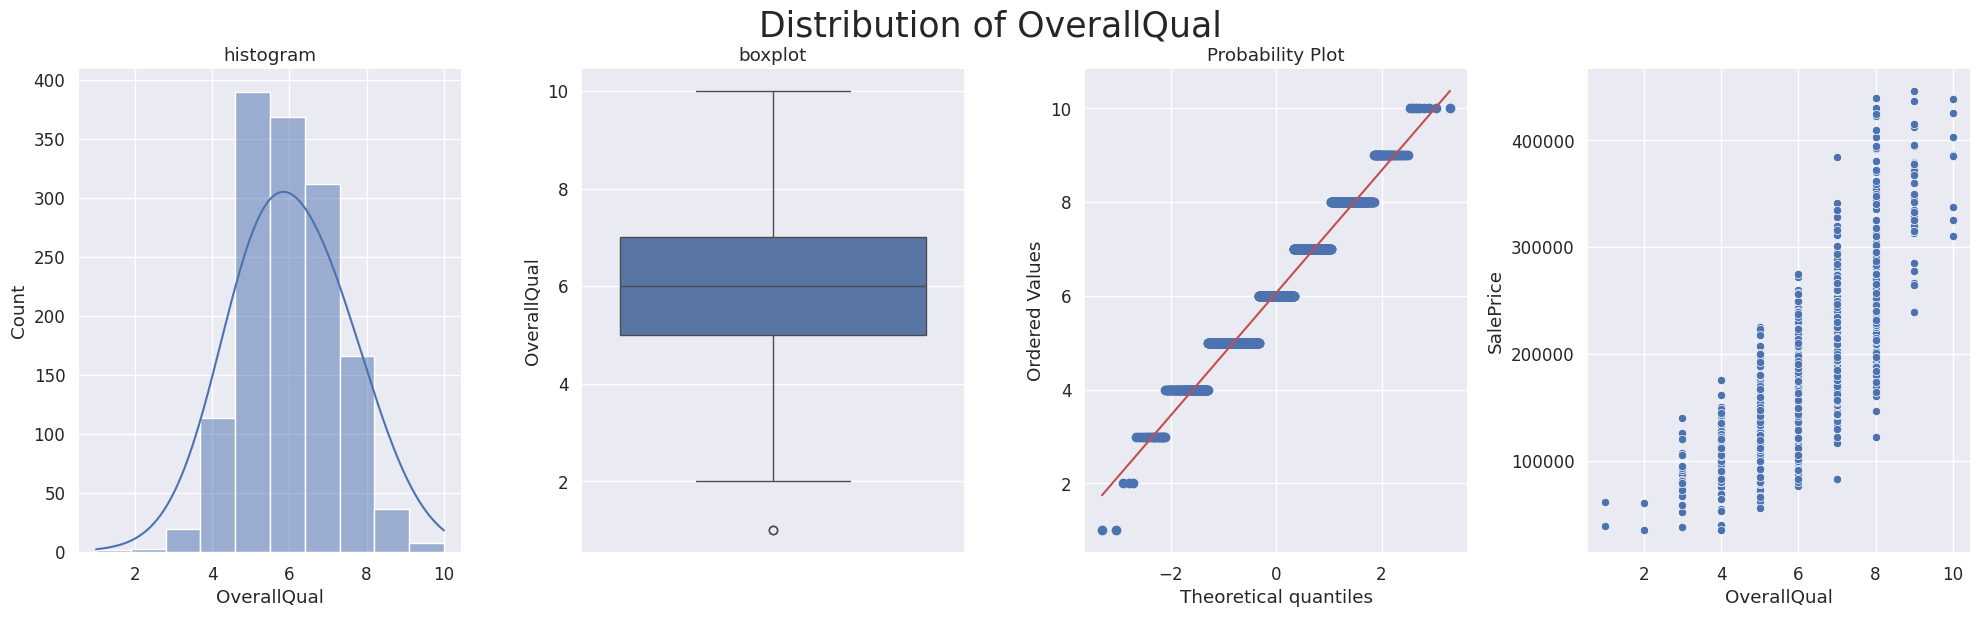

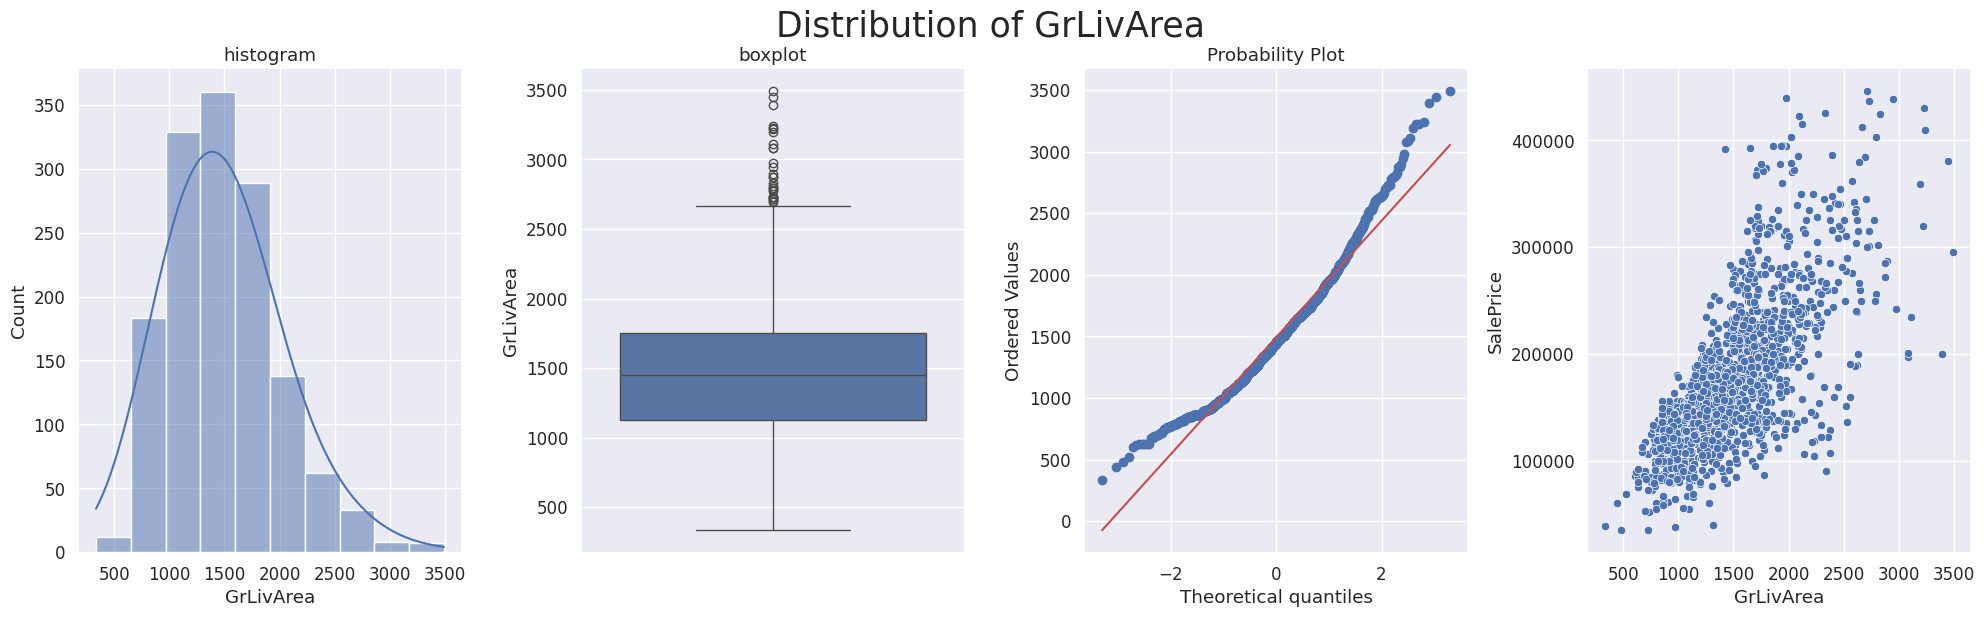

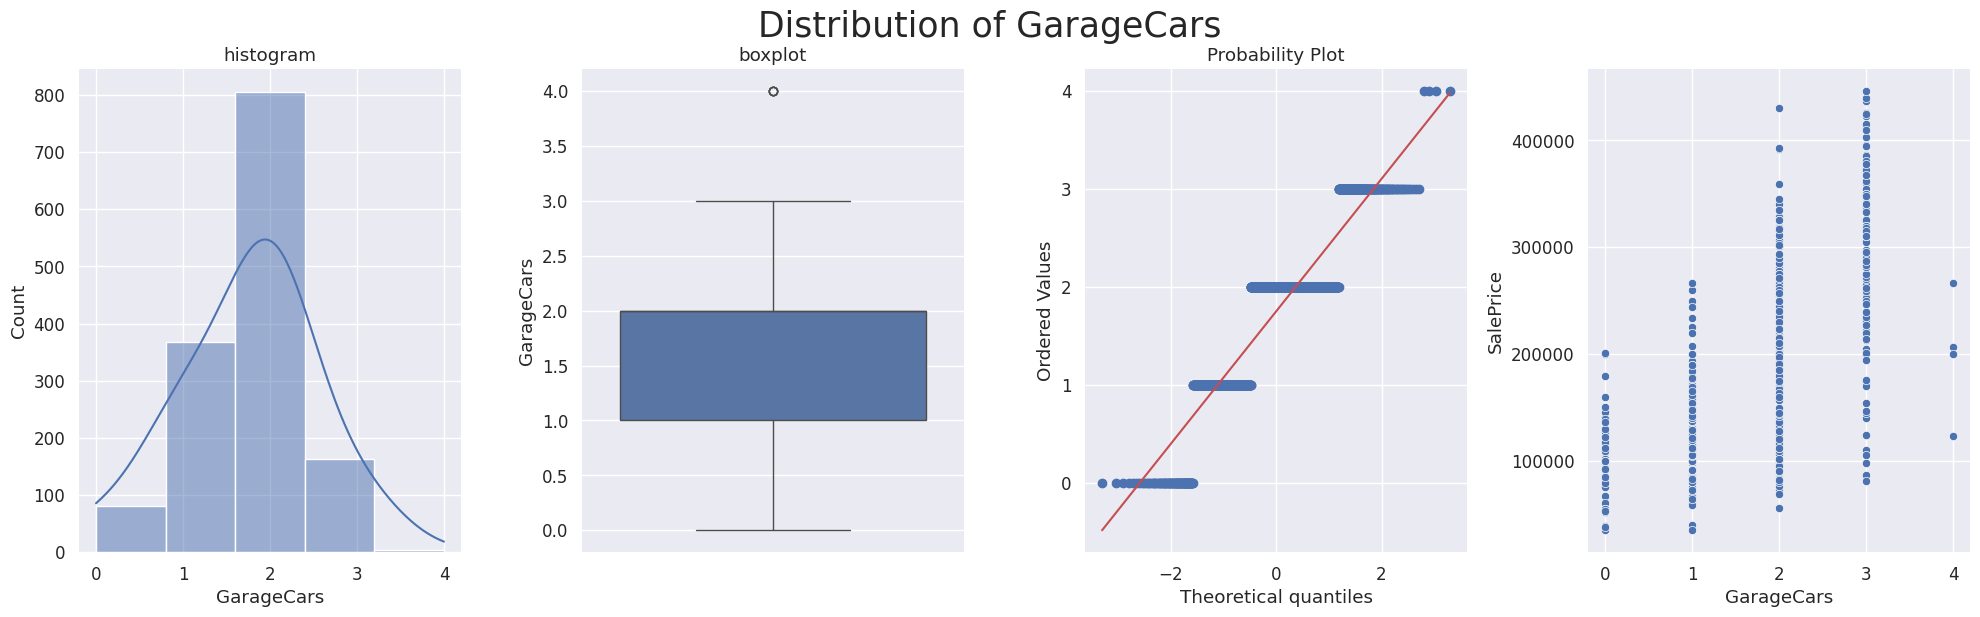

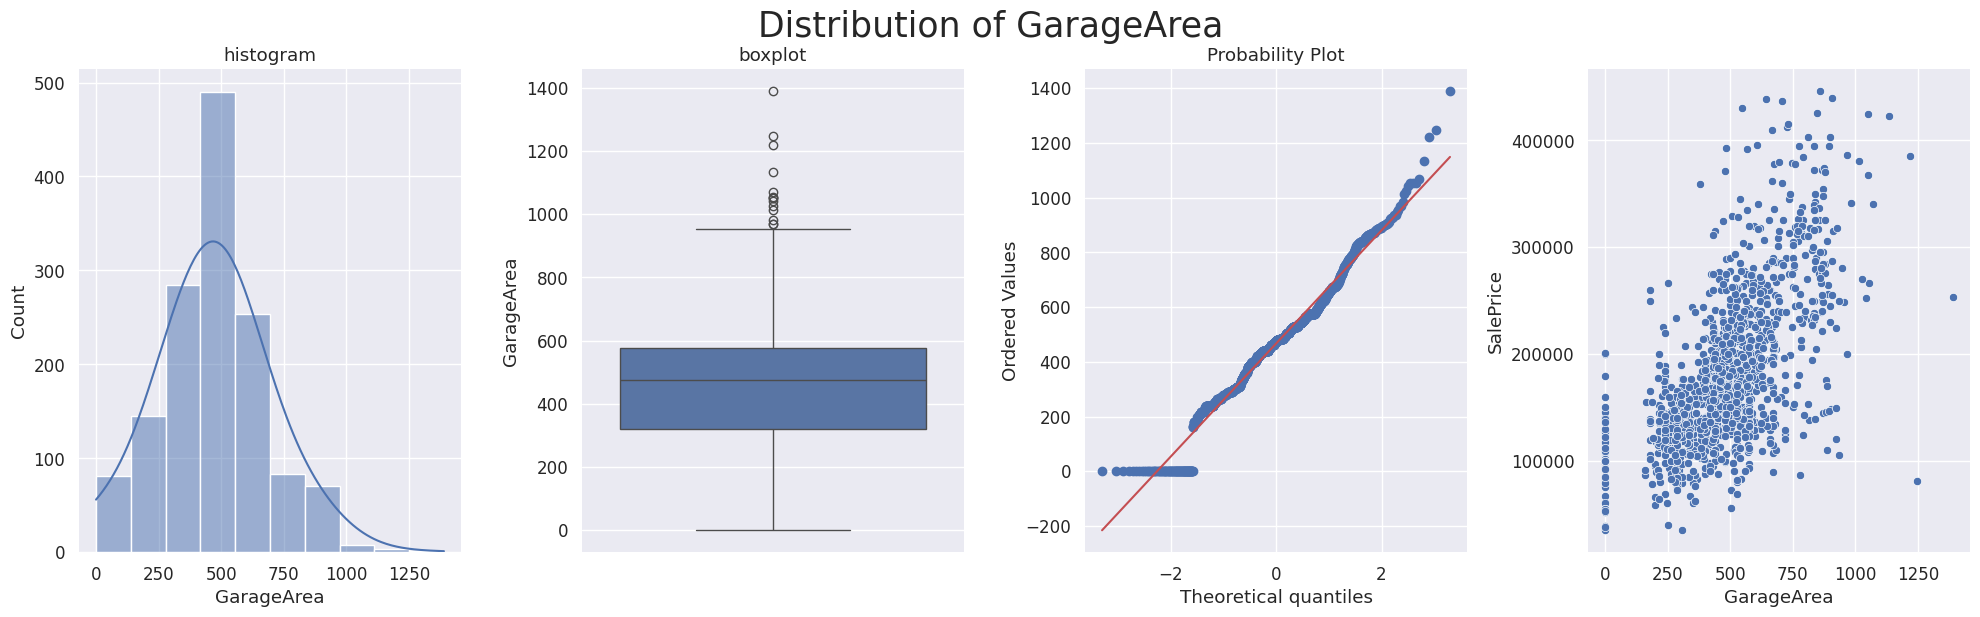

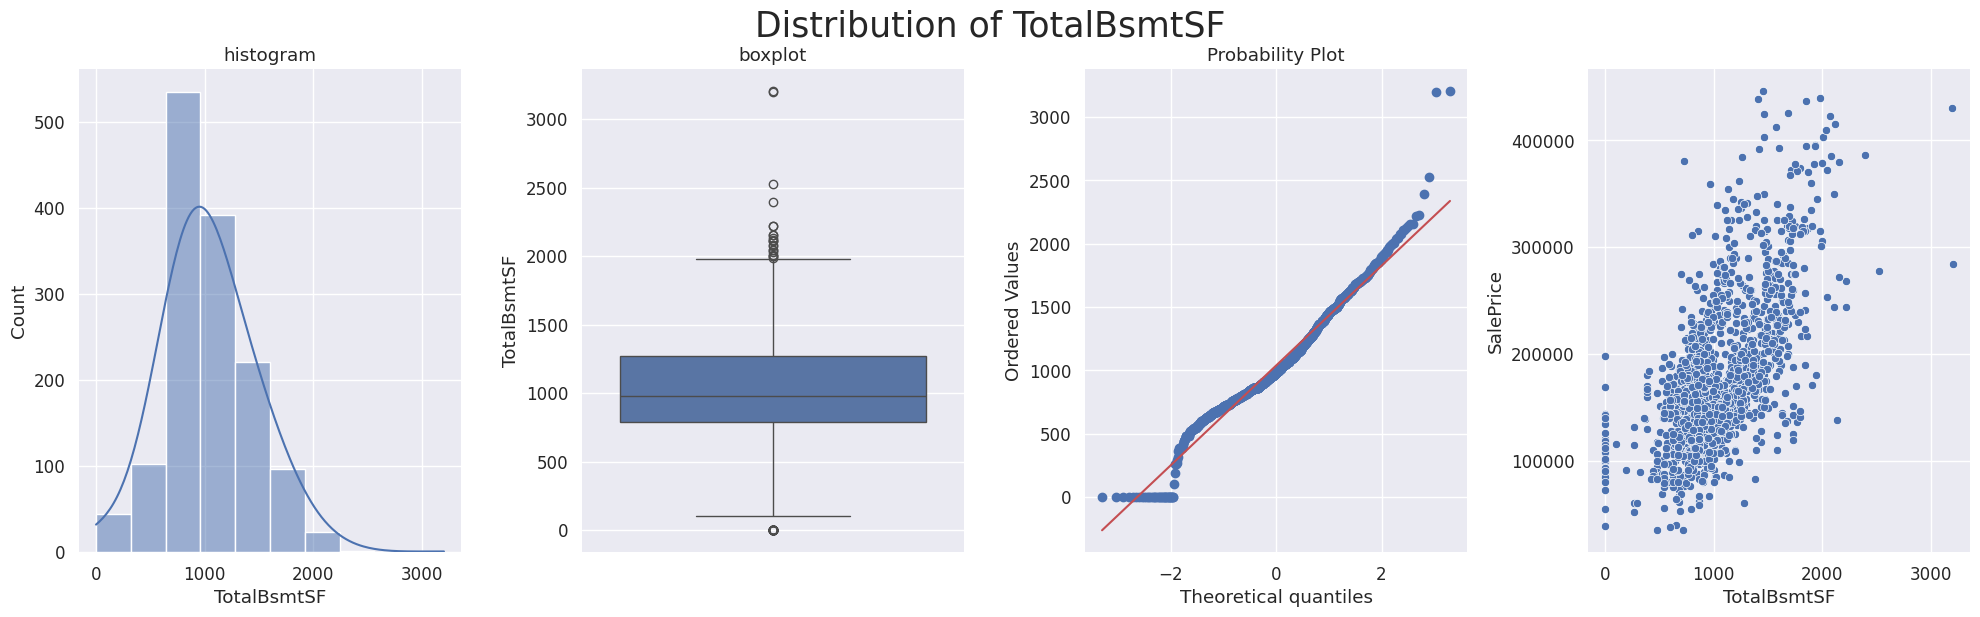

In [ ]:
# Memvisualisasikan fitur dengan korelasi tertinggi
for feature in top_features:
    univariate_numerical_plot(X,feature)

### **Pemilihan Fitur**

In [ ]:
X.dtypes.value_counts()

object     37
int64      33
float64     3
Name: count, dtype: int64

In [ ]:
# Kolom kategorikal dengan kardinalitas rendah (number of unique values in a column)
categorical_cols = [cname for cname in X.select_dtypes(["object","category","bool"]).columns
                    if X[cname].nunique() < 30]

# Kolom Numerikal dengan korelasi tinggi
numerical_cols = [cname for cname in X.select_dtypes(['int64', 'float64']).columns
                  if abs(corr_with_price.pearson[cname]) > 0]

# Memilih kolom yang diseleksi
selected_cols = categorical_cols + numerical_cols
X = X[selected_cols]

In [ ]:
# Fitur yang dipilih

print(len(categorical_cols),len(numerical_cols))

37 36


In [ ]:
X.dtypes.value_counts()

object     37
int64      33
float64     3
Name: count, dtype: int64

In [ ]:
# Untuk melihat kolom objek yang dipilih berdasarkan kondisi cardinality maksimum
# kolom numerik yang dipilih berdasarkan korelasi.
info = pd.DataFrame(X.dtypes, columns=['Dtype'])
info['Unique'] = X.nunique().values
info['Null'] = X.isnull().sum().values
info.sort_values(['Dtype', 'Unique'])

Dtype  Unique  Null
BsmtHalfBath     int64       3     0
HalfBath         int64       3     0
BsmtFullBath     int64       4     0
FullBath         int64       4     0
KitchenAbvGr     int64       4     0
Fireplaces       int64       4     0
GarageCars       int64       5     0
YrSold           int64       5     0
PoolArea         int64       6     0
BedroomAbvGr     int64       8     0
OverallCond      int64       9     0
OverallQual      int64      10     0
TotRmsAbvGrd     int64      12     0
MoSold           int64      12     0
MSSubClass       int64      15     0
3SsnPorch        int64      20     0
MiscVal          int64      21     0
LowQualFinSF     int64      23     0
YearRemodAdd     int64      61     0
ScreenPorch      int64      71     0
YearBuilt        int64     112     0
EnclosedPorch    int64     118     0
BsmtFinSF2       int64     140     0
OpenPorchSF      int64     193     0
WoodDeckSF       int64     263     0
2ndFlrSF         int64     402     0
GarageArea       int64     423     0
BsmtFinSF1       int64     615     0
TotalBsmtSF      int64     699     0
1stFlrSF         int64     728     0
BsmtUnfSF        int64     765     0
GrLivArea        int64     833     0
LotArea          int64    1036     0
GarageYrBlt    float64      96    81
LotFrontage    float64     106   246
MasVnrArea     float64     315     6
Street          object       2     0
CentralAir      object       2     0
LandSlope       object       3     0
GarageFinish    object       3    81
PavedDrive      object       3     0
LotShape        object       4     0
LandContour     object       4     0
ExterQual       object       4     0
BsmtQual        object       4    37
BsmtCond        object       4    37
BsmtExposure    object       4    38
KitchenQual     object       4     0
MSZoning        object       5     0
LotConfig       object       5     0
BldgType        object       5     0
ExterCond       object       5     0
HeatingQC       object       5     0
Electrical      object       5     1
FireplaceQu     object       5   686
GarageQual      object       5    81
GarageCond      object       5    81
RoofStyle       object       6     0
RoofMatl        object       6     0
Foundation      object       6     0
BsmtFinType1    object       6    37
BsmtFinType2    object       6    38
Heating         object       6     0
GarageType      object       6    81
SaleCondition   object       6     0
Functional      object       7     0
Condition2      object       8     0
HouseStyle      object       8     0
Condition1      object       9     0
SaleType        object       9     0
Exterior1st     object      15     0
Exterior2nd     object      16     0
Neighborhood    object      25     0

In [ ]:
show_null_values(X)

Total missing values in dataset:
1531


Housing Prices
FireplaceQu              686
LotFrontage              246
GarageType                81
GarageFinish              81
GarageQual                81
GarageCond                81
GarageYrBlt               81
BsmtExposure              38
BsmtFinType2              38
BsmtQual                  37
BsmtCond                  37
BsmtFinType1              37
MasVnrArea                 6
Electrical                 1

**Spliting Data**

Membagi data menjadi:
*   75% untuk Data Training
*   25% untuk Data Testing



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

**Pembuatan Model**

In [ ]:
# Mengatasi missing value pada kolom numerikal dengan median
numerical_transformer = SimpleImputer(strategy='median')

# Mengatasi missing value kategorikal data dengan modus
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan keduanya dengan dataset yang ada
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

XGBRegressor

In [ ]:
# Create object of class XGBRegressor
model = XGBRegressor()

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model.predict(X_train)

mae = mean_absolute_error(predictions, y_train)
r2 = r2_score(predictions, y_train)
print('Training MAE',round(mae,2))
print('Training R2',r2)

Training MAE 706.73
Training R2 0.999786877194246


In [ ]:
predictions = model.predict(X_test)

mae = mean_absolute_error(predictions, y_test)
r2=r2_score(predictions, y_test)
print('testing MAE',round(mae,2))
print('Test R2', r2,2)

testing MAE 16807.4
Test R2 0.8577767545996213 2


Random Forest Regressor

In [ ]:
# Create object of class XGBRegressor
model1 = RandomForestRegressor(random_state=42)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model.predict(X_train)

mae = mean_absolute_error(predictions, y_train)
r2 = r2_score(predictions, y_train)
print('Training MAE',round(mae,2))
print('Training R2',r2)

Training MAE 706.73
Training R2 0.999786877194246


In [ ]:
predictions = model.predict(X_test)

mae = mean_absolute_error(predictions, y_test)
r2=r2_score(predictions, y_test)
print('testing MAE',round(mae,2))
print('Test R2', r2,2)

testing MAE 16807.4
Test R2 0.8577767545996213 2


## **4. Penerapan Cross Validation Basic**

Hasil CV sebelum dituning hyperparameter

XGBRegressor

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, learning_curve

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print("r2 Scores:", cross_val_scores)
print("Mean r2 Score:", np.mean(cross_val_scores))

r2 Scores: [0.86620145 0.87802557 0.81688541 0.87220818 0.88877221 0.88013388
 0.91355179 0.81099626 0.85660468 0.90349852]
Mean r2 Score: 0.8686877953639606


Random Forest Regressor

In [ ]:
cross_val_scores1 = cross_val_score(model1, X_train, y_train, cv=kf, scoring='r2')

print("r2 Scores:", cross_val_scores1)
print("Mean r2 Score:", np.mean(cross_val_scores1))

r2 Scores: [0.88359944 0.87470899 0.84095302 0.87549874 0.88895012 0.91342559
 0.90824199 0.8241368  0.87775189 0.88507282]
Mean r2 Score: 0.8772339390903131


## **5. Penjelasan Hasil Cross Validation**

Berdasarkan hasil cross-validation, Rata-rata skor r2 dari model Random Forest Regressor sedikit lebih tinggi dibandingkan dengan model XGBoost. Berdasarkan skor r2, model Random Forest Regressor mungkin sedikit lebih unggul dibandingkan dengan model XGBoost dalam menjelaskan variasi data.

Namun, perlu diingat bahwa hasil ini hanya berdasarkan pada satu set data dan satu metode cross-validation. Untuk mendapatkan kesimpulan yang lebih definitif, diperlukan penelitian lebih lanjut dengan menggunakan set data yang berbeda dan metode cross-validation yang berbeda

## **6. Penerapan Learning Curves**

In [ ]:
def plot_learning_curve(model, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.title('Learning Curve r2 score')
    plt.xlabel('Training Data')
    plt.ylabel('Score')

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation Score')

    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

XGBRegressor

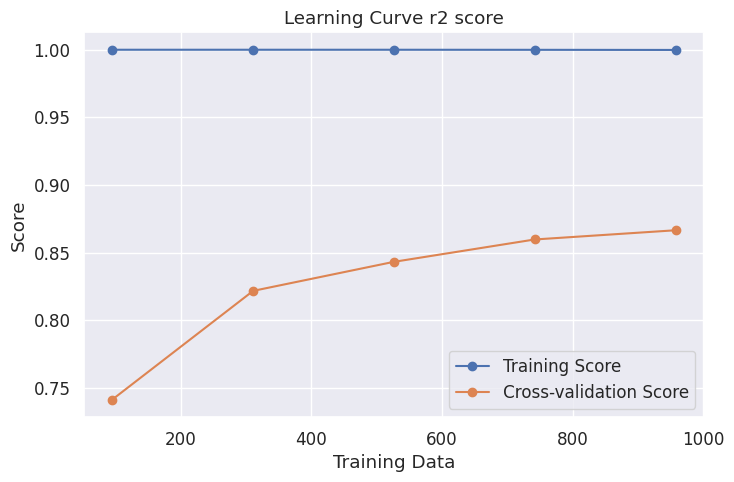

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=kf)

Random Forest Regressor

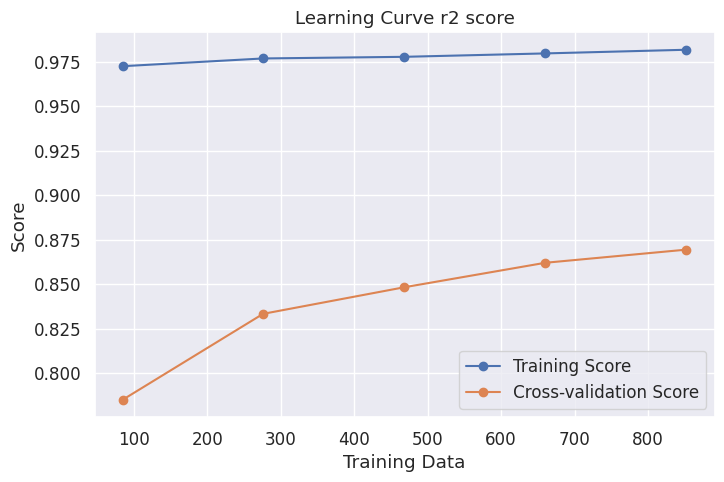

In [ ]:
plot_learning_curve(model1, X_train, y_train, cv=5)

## **7. Penjelasan Learning Curves**

Berdasarkan hasil visualisasi learning curve di atas, kedua model cenderung menunjukan tanda-tada adanya overfitting. Hal ini terlihat dari perbedaan yang signifikan antara skor training dan skor cross-validation (CV). Ini berarti model memiliki performa yang baik pada data training, namun tidak mampu menggeneralisasi dengan baik saat diterapkan pada data baru.

Namun, kurva Random Forest Regressor menunjukkan perbedaan skor training dan CV yang lebih kecil dibandingkan dengan XGBoost. Ini menunjukkan bahwa meskipun overfitting masih terjadi, Random Forest Regressor memiliki kemampuan generalisasi yang sedikit lebih baik dalam kasus ini. Hal ini sejalan dengan hasil cross-validation sebelumnya yang menunjukkan performa yang sedikit lebih baik untuk Random Forest Regressor.

## **8. Memperbaiki akurasi Machine Learning menggunakan Tuning Hyperparameter**

Menggunakan GridSearch untuk mencari hyperparameter yang terbaik dan dipadukan dengan Cross Validation

XGBRegressor

In [ ]:
param_grid = [
    {'subsample': [0.5], 'n_estimators': [1400],
     'max_depth': [5], 'learning_rate': [0.02],
     'colsample_bytree': [0.4], 'colsample_bylevel': [0.5],
     'reg_alpha':[2], 'reg_lambda': [1]}
]
grid_search = GridSearchCV(model, param_grid, cv=kf, verbose=1, scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(X_train, y_train);

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [ ]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.815612      0.492186         0.014514        0.000893   

  param_colsample_bylevel param_colsample_bytree param_learning_rate  \
0                     0.5                    0.4                0.02   

  param_max_depth param_n_estimators param_reg_alpha param_reg_lambda  \
0               5               1400               2                1   

  param_subsample                                             params  \
0             0.5  {'colsample_bylevel': 0.5, 'colsample_bytree':...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0       -12072.86821      -13377.238719      -13237.874197      -13412.867699   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0      -14876.685675      -11882.916716       -14065.91233      -12984.758034   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0      -15253.063495      -14421.723614    -13558.590869     1054.158785   

   rank_test_score  
0                1

In [ ]:
grid_search.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 0.4,
 'learning_rate': 0.02,
 'max_depth': 5,
 'n_estimators': 1400,
 'reg_alpha': 2,
 'reg_lambda': 1,
 'subsample': 0.5}

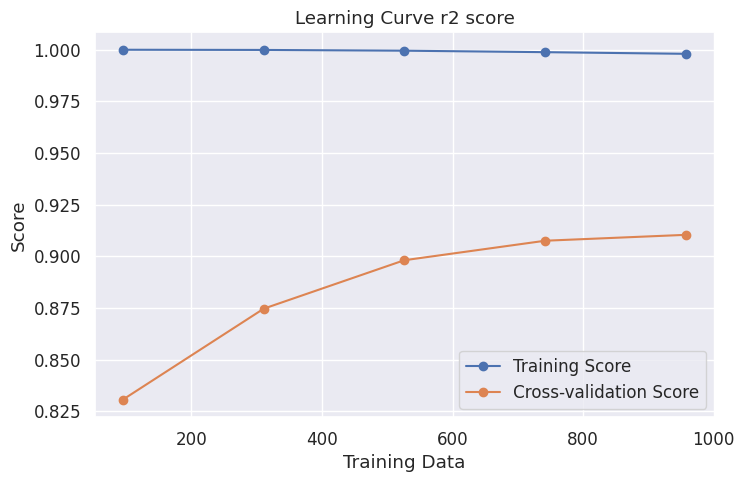

In [ ]:
best_model = grid_search.best_estimator_
plot_learning_curve(best_model, X_train, y_train, cv=kf)

Random Forest Regressor

In [ ]:
random_grid = {'n_estimators':[300],
              'max_depth':[13],
              'max_leaf_nodes':[9]}

In [ ]:
rf_random = GridSearchCV(model1, random_grid, cv=kf, verbose=1, scoring='neg_mean_absolute_error')

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [13], 'max_leaf_nodes': [9],
                         'n_estimators': [300]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
rf_random.best_params_

{'max_depth': 13, 'max_leaf_nodes': 9, 'n_estimators': 300}

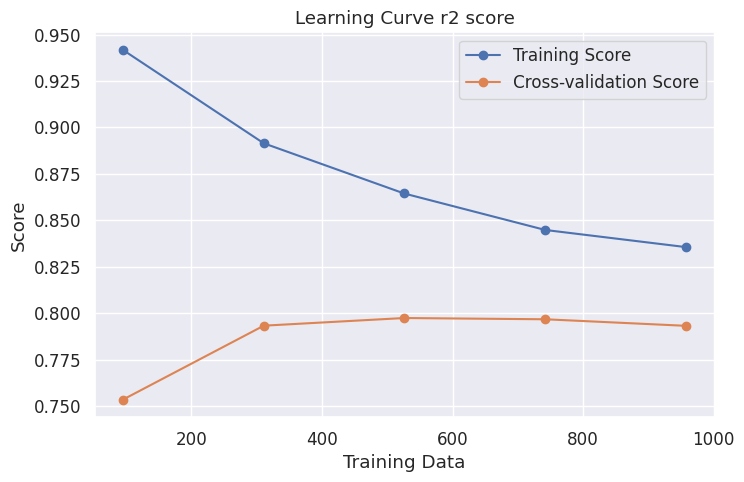

In [ ]:
best_model1 = rf_random.best_estimator_
plot_learning_curve(best_model1, X_train, y_train, cv=kf)

## **9. Pengukuran model menggunakan Metric Evaluation**

Berikut Metric evaluation setelah dilakukan tuning hyperparameter, dapat dilihat bahwa score dari model meningkat dari sebelum tuning.

XGBRegressor

Score cv sebelum dituning

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

In [ ]:
print("r2 Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print("Mean r2 Score:", round(mean_cv_score, 3))

r2 Scores: [0.86620145 0.87802557 0.81688541 0.87220818 0.88877221 0.88013388
 0.91355179 0.81099626 0.85660468 0.90349852]
Mean r2 Score: 0.869


Cross Validation untuk model baru setelah tuning hyperparameter

In [ ]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')

In [ ]:
print("r2 Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print("Mean r2 Score:", round(mean_cv_score, 3))

r2 Scores: [0.9170377  0.92418349 0.91112647 0.92053618 0.92133229 0.93475027
 0.90882933 0.87037969 0.86593802 0.9287338 ]
Mean r2 Score: 0.91


In [ ]:

print("Mean Absolute Error on validation data:",-grid_search.best_score_)

Mean Absolute Error on validation data: 13558.590868839272


**Metric Evaluation dari Data Train**

In [ ]:
predict_train = model.predict(X_train)
y_preds = best_model.predict(X_train)

In [ ]:
mae = mean_absolute_error(y_train, predict_train)
r2 = r2_score(y_train, predict_train)

print("Data Train Sebelum Tuning:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

mae = mean_absolute_error(y_train, y_preds)
r2 = r2_score(y_train, y_preds)

print("Data Train Setelah Tuning:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

Data Train Sebelum Tuning:
Mean Absolute Error (MAE): 706.7344116784037
R-squared (R^2) Score: 1.0
Data Train Setelah Tuning:
Mean Absolute Error (MAE): 2643.327020980047
R-squared (R^2) Score: 0.997


**Metric Evaluation Data Test**

In [ ]:
predictions = model.predict(X_test)
y_pred = best_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Data test before tuning")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Data test after tuning")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

Data test before tuning
Mean Absolute Error (MAE): 16807.402870435395
R-squared (R^2) Score: 0.874
Data test after tuning
Mean Absolute Error (MAE): 12470.36560744382
R-squared (R^2) Score: 0.932


**Learning Curve Akhir**

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


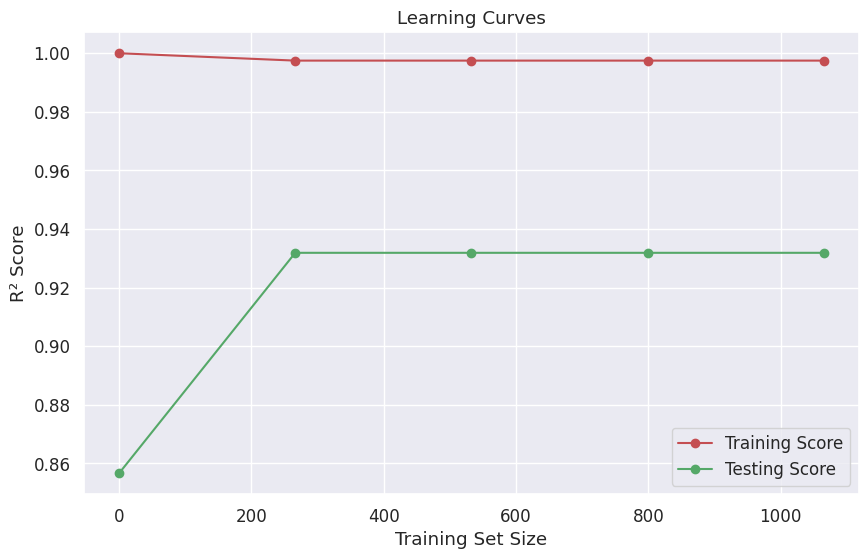

In [ ]:
train_sizes = np.linspace(0.1, 1065, 5)  # Generate 50 points from 0.1 to 1

learning_curve_train = []
learning_curve_test = []

for train_size in train_sizes:
    num_samples = int(train_size * X_train.shape[0])
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    grid_search.fit(X_subset, y_subset)

    y_pred_train = grid_search.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)  # Append the calculated R2 score

    y_pred_test = grid_search.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)  # Append the calculated R2 score

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.grid(True)
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

###Random Forest Regressor

Score cv sebelum tuning

In [ ]:
cv_scores = cross_val_score(model1, X_train, y_train, cv=kf, scoring='r2')

In [ ]:
print("r2 Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print("Mean r2 Score:", round(mean_cv_score, 3))

r2 Scores: [0.88359944 0.87470899 0.84095302 0.87549874 0.88895012 0.91342559
 0.90824199 0.8241368  0.87775189 0.88507282]
Mean r2 Score: 0.877


Cross validation model baru yang telah dituning hyperparameter

In [ ]:
cv_scores = cross_val_score(best_model1, X_train, y_train, cv=kf, scoring='r2')

In [ ]:
print("r2 Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print("Mean r2 Score:", round(mean_cv_score, 3))

r2 Scores: [0.78800335 0.81977452 0.7441085  0.8199943  0.81171046 0.82888327
 0.81557496 0.73467954 0.7805901  0.788479  ]
Mean r2 Score: 0.793


In [ ]:
print("Mean Absolute Error on validation data:",-rf_random.best_score_)

Mean Absolute Error on validation data: 22778.326705450432


**Metric Evaluation dari Data Train**

In [ ]:
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predict_train = model1.predict(X_train)
y_preds = best_model1.predict(X_train)

In [ ]:
mae = mean_absolute_error(y_train, predict_train)
r2 = r2_score(y_train, predict_train)

print("Data Train Sebelum Tuning:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

mae = mean_absolute_error(y_train, y_preds)
r2 = r2_score(y_train, y_preds)

print("Data Train Setelah TUning:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

Data Train Sebelum Tuning:
Mean Absolute Error (MAE): 6114.01028169014
R-squared (R^2) Score: 0.983
Data Train Setelah TUning:
Mean Absolute Error (MAE): 21080.491367990962
R-squared (R^2) Score: 0.829


**Metric Evaluation Data Test**

In [ ]:
predictions = model1.predict(X_test)
y_pred = best_model1.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Data test before tuning")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Data test after tuning")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

Data test before tuning
Mean Absolute Error (MAE): 16308.532022471909
R-squared (R^2) Score: 0.878
Data test after tuning
Mean Absolute Error (MAE): 22614.001299807464
R-squared (R^2) Score: 0.8


**Learning Curve Akhir**

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


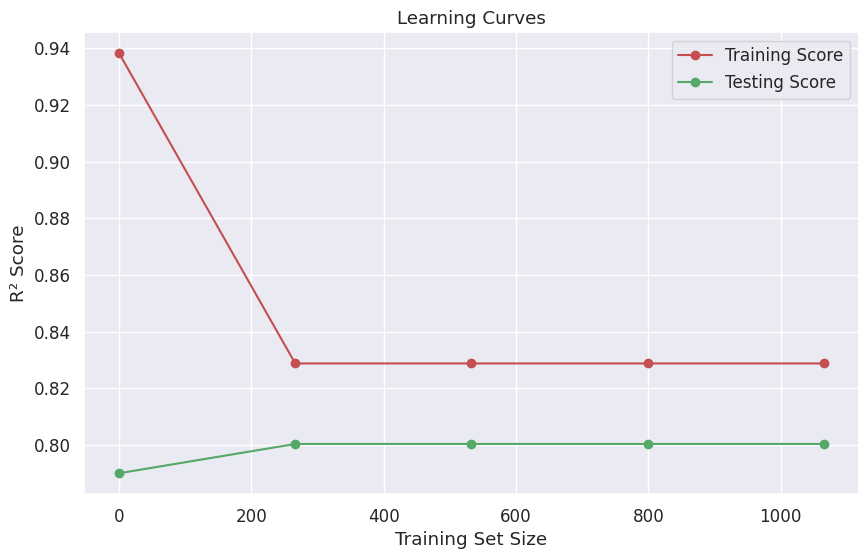

In [ ]:
train_sizes = np.linspace(0.1, 1065, 5)

learning_curve_train = []
learning_curve_test = []

for train_size in train_sizes:
    num_samples = int(train_size * X_train.shape[0])
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    rf_random.fit(X_subset, y_subset)

    y_pred_train = rf_random.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)  # Append the calculated R2 score

    y_pred_test = rf_random.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)  # Append the calculated R2 score

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.grid(True)
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

### **10. Interpretasi Metric Evaluation**

R2 Score dan Mean Absolute Error (MAE) merupakan dua metrik evaluasi penting dalam konteks prediksi harga rumah. Masing-masing metrik memberikan informasi yang berharga untuk menilai performa model.

- R2 Score:
Mengukur seberapa baik model regresi menjelaskan variabilitas harga rumah berdasarkan fitur-fitur yang digunakan.
Nilai R2 Score mendekati 1 menunjukkan bahwa model mampu menjelaskan sebagian besar variasi harga rumah dengan baik.
Hal ini berarti model menghasilkan prediksi yang lebih akurat dan bermanfaat bagi berbagai pihak di pasar properti, seperti pemilik rumah, pembeli, atau pemangku kepentingan lainnya.
- Mean Absolute Error (MAE):
Mengukur rata-rata kesalahan prediksi harga rumah.Dalam konteks harga rumah, kesalahan prediksi yang signifikan dapat berdampak finansial besar. MAE membantu menilai seberapa besar rata-rata kesalahan yang dilakukan model dalam memprediksi harga rumah.



**Metric for XGB Regressor**

Hasil tuning hyperparameter pada XGBRegressor menunjukkan perbaikan yang signifikan setelah tuning hyperparameter pada model. Sebelum penyetelan, rata-rata skor R-squared (r2) adalah 0.869, yang menunjukkan kinerja yang baik tetapi masih ada ruang untuk perbaikan. Setelah tuning hyperparameter, rata-rata skor R-squared meningkat menjadi 0.91. Ini menunjukkan bahwa model yang telah dituning memiliki kemampuan yang lebih baik dalam menjelaskan variasi dalam data target daripada model sebelumnya.



**Metric For Random Forest Regressor**

Hasil evaluasi metrik menunjukkan penurunan kinerja yang signifikan setelah tuning hyperparameter pada model Random Forest Regressor. Sebelum penyetelan, rata-rata skor R-squared (r2) adalah 0.877, menunjukkan kinerja yang relatif baik dari model sebelum penyetelan. Namun, setelah tuning hyperparameter, rata-rata skor R-squared menurun menjadi 0.793. Ini menunjukkan bahwa model yang telah dituning mengalami penurunan kemampuan dalam menjelaskan variasi dalam data target dibandingkan dengan model sebelumnya.

**Kesimpulan**

Berdasarkan hasil evaluasi metrik setelah tuning hyperparameter pada kedua algoritma, XGBoost Regressor menunjukkan peningkatan kinerja yang lebih baik dibandingkan dengan Random Forest Regressor pada dataset ini.

XGBoost Regressor dapat dianggap sebagai pilihan yang lebih baik untuk dataset ini karena mampu menghasilkan model yang lebih baik dalam memprediksi variabel target. Oleh karena itu, untuk aplikasi di mana prediksi akurat dari variabel target sangat penting, seperti dalam masalah regresi, XGBoost Regressor dapat dianggap sebagai pilihan yang lebih unggul pada dataset ini.